## LLM: Attention Mechanism

4 types of attention mechanism
1. Simplified attention
    - simplified self attention technique
2. Self attention
    - self attention with trainable weights
3. Casual attention
    - self attention that allows model to only consider previous and current inputs in a sequence
    - prevents the model from accessing future information in a sequence
4. Multihead attention
    - an extension of self attention and causal attention that enables the model to simultaneously attend the information from different representative subspace
    - LLM attends to various input data in parallel
    - splits the attention mechanism into multiple head, each learns a different aspect of the data -> improving the overall model


The problem with modeling long sequence:
- in case of language translation, translation process require contextual understanding and grammar alignment. 
- this is not possible when we try to perform word to word translation.
- One solution was to utilise a neural network with two sub modules, an encoder and a decoder
    - encoder reads and processes the text into a context vector
    - decoder translate the text using the context vector 
- before transformers, RNN were used the most popular encoder and decoder architecture
    - RNN or recurrent neural network: output from previous step is fed as input to the current model

steps of RNN encoder decoder architecture 
1. Input text
2. Enoder (processes input text sequentially)
3. Updates hidden state at each step ( internal values at hidden layers )
4. final hidden state ( encoder tries to capture sentence meaning )
5. Decoder uses this final hidden state to generate translated sentence ( decoder also updates its hidden state at each time )

- the encoder processes the entire text into a hidden state ( memory cell ). Decoder takes this hidden state to produce an output
- Big Issue: 
    - RNN cannot directly access earlier hidden states from the encoder during the encoding phase
    - it relies solely on the current hidden state
    - this lead to a loss of context, especially in complex sentences where dependencies might span long distance
    - Difficult for RNN to capture all information in a single vector

- Capturing data dependencies with attention mechanism 
- in RNN, the decoder does not have access to previous words as input along with the context vector

### Bahdanau attention mechanism
- 2014, first attention mechanism for RNNs: Bahdanau attention mechanim 
- it modifies the encoder and decoder RNN such that the decoder can selectively access different parts of the input sequence at each decoding step
- allows decoder to access all previous tokens of encoder
- utlised attention weights  
- Paper: Neural Machine Translatoin by Jointly Learning to Align and Translate
- inspired the transformer architecture
 
### Self Attention Mechanism 
- dynamic focus on different parts of the input sequnece allowing models to learn long range dependencies effectively
- Self attention : allows each position of the input sequence to attend to all positions in the same sequence when computing the representation of a sequence
- self refers to the mechanism's ability to compute attention weights by relating different positions in a single input sequence



## Simple self attention mechanism 
- variant of self attention 
- does not contain any trainable weights

x : token embeddings <br>
a : attention weights <br>
z : context embeddings <br>

In [1]:
text = "Your journey starts with one step"

In [19]:
import torch

inputs = torch.tensor(
    [
        [0.43, 0.15, 0.89], # Your     (x^1)
        [0.55, 0.87, 0.66], # journey  (x^2)
        [0.57, 0.85, 0.64], # starts   (x^3)
        [0.22, 0.58, 0.33], # with     (x^4)
        [0.77, 0.25, 0.10], # one      (x^5)
        [0.05, 0.80, 0.55]  # step     (x^6)
    ]
)

Query : token that is in focus 

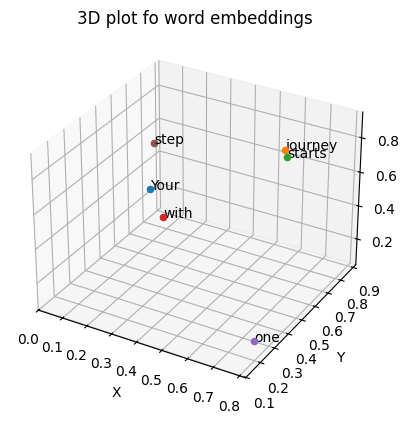

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

words = ["Your", "journey", "starts", "with", 'one', 'step']

x_coord = inputs[:, 0].numpy()
y_coord = inputs[:, 1].numpy()
z_coord = inputs[:, 2].numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

for x,y,z, word in zip(x_coord, y_coord, z_coord, words):
    ax.scatter(x,y,z)
    ax.text(x,y,z, word, fontsize=10)

ax.set_xlabel("X")
ax.set_ylabel('Y')
ax.set_zlabel("Z")

plt.title("3D plot fo word embeddings")
plt.show()

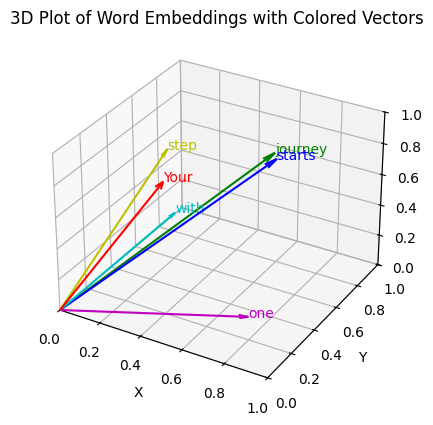

In [6]:

# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coord, y_coord, z_coord, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

### Normalization

dot product 
- determines the extend to which elements of a sequnece attend to one nother
- higher the dot product, higher the similarity and attention scores between two elements


In [ ]:
# attention score of "journey"
query = inputs[1]
attn_score_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_score_2[i] = torch.dot(x_i, query)
print(attn_score_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [ ]:
# normalising the attention score
# maintaining training stability in an LLM
attn_weight_2 = attn_score_2 / attn_score_2.sum()

print("Attention weights: ", attn_weight_2)
print("sum of attention weights: ", attn_weight_2.sum())

Attention weights:  tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
sum of attention weights:  tensor(1.0000)


Softmax normalization is more advisable and better. <br>
Normal softmax implementation -> e^x_i / sum  <br>
pytorch softmax implementatoin -> e^(x_i - max) / sum,  <br>
sum is summation of e^(x_i) <br>
pytorch uses max to resolve overflow and underflow issues when dealing with large and small values <br>

In [ ]:
# softmax naive version
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_weight_2_naive = softmax_naive(attn_score_2)

print("Attention weights: ", attn_weight_2_naive)
print("sum of attention weights: ", attn_weight_2_naive.sum())

print()

# softmax pytorch version
attn_weight_2 = torch.softmax(attn_score_2, dim=0)

print("Attention weights: ", attn_weight_2)
print("sum of attention weights: ", attn_weight_2.sum())

Attention weights:  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
sum of attention weights:  tensor(1.)

Attention weights:  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
sum of attention weights:  tensor(1.)


### Context Vector

In [11]:
query = inputs[1]

context_vector_2 = torch.zeros(query.shape)
for i, x_i in enumerate(inputs):
    context_vector_2 += attn_weight_2[i] * x_i

print(context_vector_2)

tensor([0.4419, 0.6515, 0.5683])


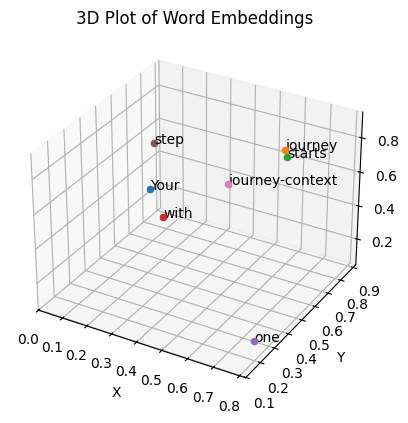

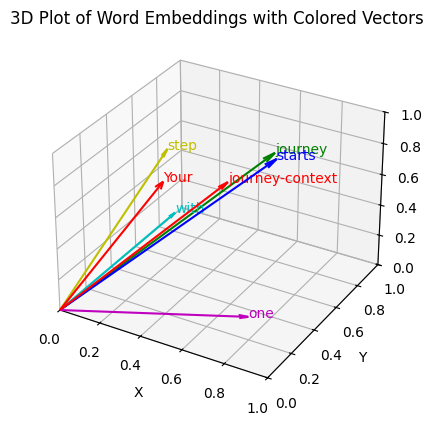

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

inputs_context = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55], # step     (x^6)
   [0.4419, 0.6515, 0.5683]]
)

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step', 'journey-context']

# Extract x, y, z coordinates
x_coords = inputs_context[:, 0].numpy()
y_coords = inputs_context[:, 1].numpy()
z_coords = inputs_context[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'r']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

In [21]:
inputs

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

In [20]:
attn_scores = torch.empty(6,6)

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i,j] = torch.dot(x_i, x_j)

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


For loops are slow.
Same result can be acheived using matrix mulitplication

In [23]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [26]:
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)
print("All row sums: ", attn_weights.sum(dim=-1))

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])
All row sums:  tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [27]:
all_context_vectors = attn_weights @ inputs 
print(all_context_vectors)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


## Implementing Self Attention with trainable weights
- original architecture 
- also called as scaled dot-product attention 
- 3 trainable weights matrices 
    - W_q, W_k, W_v = weigth matrices of query, key, value
    - Keys = input * W_k
    - Queries = input * W_q
    - Values = input * W_v

- why key, query, value ?
    - Query:
        - analogous to search query in a database
        - represents the current token the model focuses on 
    - Key:
        - in attention mechanism, each item in input sequence has a key
        - used to match with the query
    - Value:
        - represents the actual content or representation of the input items
        - once the model determines which keys are most relevant to the query, it retrieves the corresponding values


### Step 1: Computing Queries, Keys, values matrices

In [28]:
import torch

inputs = torch.tensor(
    [
        [0.43, 0.15, 0.89], # Your     (x^1)
        [0.55, 0.87, 0.66], # journey  (x^2)
        [0.57, 0.85, 0.64], # starts   (x^3)
        [0.22, 0.58, 0.33], # with     (x^4)
        [0.77, 0.25, 0.10], # one      (x^5)
        [0.05, 0.80, 0.55]  # step     (x^6)
    ]
)

In [31]:
x_2 = inputs[1]
d_in = inputs.shape[1]
d_out = 2

torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

print(W_query, W_key, W_value, sep="\n")

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])
Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]])
Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]])


In [ ]:
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value

print(query_2, key_2, value_2, sep="\n")

tensor([0.4306, 1.4551])
tensor([0.4433, 1.1419])
tensor([0.3951, 1.0037])


In [33]:
queries = inputs @ W_query
keys = inputs @ W_key
values = inputs @ W_value

print(queries.shape, keys.shape, values.shape)

torch.Size([6, 2]) torch.Size([6, 2]) torch.Size([6, 2])


### Computing the attention scores

In [34]:
keys_2 = keys[1] 
attn_score_22 = query_2.dot(keys_2)
attn_score_22

tensor(1.8524)

In [35]:
attn_score_2 = query_2 @ keys.T
attn_score_2

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])

In [37]:
attn_scores = queries @ keys.T
attn_scores

tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])

### Step 2: Scaling by Square root of key's dimensions
- Reason 1: Stability in learning
    - softmax is sensitive to the magnitude of the inputs
    - softmax values becomes peaky (meaning the difference between the largest value of softmax and others are very large)
    - softmax applied to the dot product of queries and keys 
    - model can becomes overly dependent on a particular key if the dot product is very lage
    - divide by sqrt so that values are not large
- Reason 2: to make the variance of the dot product stable
    - dot product of Q and K increses the variance
    - increase in variance grows with the dimension
    - dividing by sqrt keeps the variance close to 1


In [ ]:
d_k = keys.shape[-1]
print("Key's dimension: ",d_k)
attn_weights_2 = torch.softmax(attn_score_2 / d_k**0.5, dim=-1)
print(attn_weights_2)

Key's dimension:  2
tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


In [42]:
attn_weights = torch.softmax(attn_scores / d_k**0.5, dim=-1)
attn_weights

tensor([[0.1551, 0.2104, 0.2059, 0.1413, 0.1074, 0.1799],
        [0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820],
        [0.1503, 0.2256, 0.2192, 0.1315, 0.0914, 0.1819],
        [0.1591, 0.1994, 0.1962, 0.1477, 0.1206, 0.1769],
        [0.1610, 0.1949, 0.1923, 0.1501, 0.1265, 0.1752],
        [0.1557, 0.2092, 0.2048, 0.1419, 0.1089, 0.1794]])

### Step 3: Computing the context vector
context vetor = attention weights * values 

In [43]:
context_vector = attn_weights @ values
context_vector

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]])

### Self Attention Python Class

In [44]:
from torch import nn

class SelfAttention_v1(nn.Module):
    
    def __init__(self,d_in, d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))
    
    def forward(self, x):
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value

        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        context_vec = attn_weights @ values

        return context_vec

In [48]:
d_in, d_out

(3, 2)

In [49]:
sa_v1 = SelfAttention_v1(3, 2)
print(sa_v1(inputs))

tensor([[0.6472, 1.0750],
        [0.6661, 1.1111],
        [0.6652, 1.1094],
        [0.6479, 1.0759],
        [0.6359, 1.0530],
        [0.6585, 1.0963]], grad_fn=<MmBackward0>)


Improving the above implementation by utilising PyTorch's nn.Linear layers as it has an optimized weight initialization scheme, contributing to more stable and effective model training

In [ ]:
class SelfAttention_v2(nn.Module):
    
    def __init__(self,d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
    
    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        
        context_vec = attn_weights @ values
        return context_vec

In [52]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(3, 2)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


## Causal Attention
- also known as masked attention 
- restricts model to only consider previous and current inputs in a sequence
- unlike causal, self attention allows access to the entire input sequence at once
- model only factors in tokens that occur at or beore the current token in the sequence
- mask out the attention weights above the diagonal and normalize the non masked attention weights (so that they ? )